# NP Completeness

## Traveling Salesman Problem (TSP)
Famous __NP hard__ problem. There is no known polynomial time solution.

Given a set of cities and distance between every pair of cities, find the __shortest__ possible route to __visit every city exactly once__ and __return__ to the starting point.

Different from the __Hamiltonian cycle__ problem: find if there exist a __tour that visits every city exactly once__. Here we know that Hamiltonian Tour exists (graph is complete) and in fact __many such tours exist__, the problem is to find a __minimum weight Hamiltonian cycle__.

For example, consider the graph shown in figure. A TSP tour in the graph is 1-2-4-3-1. The cost of the tour is 10+25+30+15 which is 80.

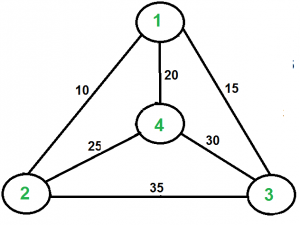

Factorial / combinatorial time solution:
* Any point can be starting, select one and generate all __(n-1)! permutations__ of cities.
* Calculate __cost of every permutation__ & return the __permutation with minimum cost__

In [9]:
# Naive approach
from sys import maxsize 
V = 4

def travellingSalesmanProblem(graph, s):  
    
    vertices = []                                          # store all verteces, but source vertex 
    for i in range(V): 
        if i != s: 
            vertices.append(i)  
    
    min_pathweight = maxsize                               # store min weight Hamiltonian Cycle
  
    while True:
         
        current_pathweight = 0                             # store current Path weight(cost)  
        
        k = s                                              # compute current path weight 
        for i in range(len(vertices)): 
            current_pathweight += graph[k][vertices[i]] 
            k = vertices[i] 
        current_pathweight += graph[k][s]  
        
        min_pathweight = min(min_pathweight, current_pathweight)       # update minimum 
  
        if not next_permutation(vertices): 
            break
  
    return min_pathweight 
  

def next_permutation(L): 
  
    n = len(L) 
  
    i = n - 2
    while i >= 0 and L[i] >= L[i + 1]: 
        i -= 1
  
    if i == -1: 
        return False
  
    j = i + 1
    while j < n and L[j] > L[i]: 
        j += 1
    j -= 1
  
    L[i], L[j] = L[j], L[i] 
  
    left = i + 1
    right = n - 1
  
    while left < right: 
        L[left], L[right] = L[right], L[left] 
        left += 1
        right -= 1
  
    return True
  
# Driver Code 
if __name__ == "__main__": 
  
    # matrix representation of graph 
    graph = [[0, 10, 15, 20], [10, 0, 35, 25],  
             [15, 35, 0, 30], [20, 25, 30, 0]] 
    s = 0
    print(travellingSalesmanProblem(graph, s)) 

80


In [8]:
# Dynamic approach: https://towardsdatascience.com/solving-tsp-using-dynamic-programming-2c77da86610d
def DP_TSP(distances_array):
    n = len(distances_array)
    all_points_set = set(range(n))

    # memo keys: tuple(sorted_points_in_path, last_point_in_path)
    # memo values: tuple(cost_thus_far, next_to_last_point_in_path)
    memo = {(tuple([i]), i): tuple([0, None]) for i in range(n)}
    queue = [(tuple([i]), i) for i in range(n)]

    while queue:
        prev_visited, prev_last_point = queue.pop(0)
        prev_dist, _ = memo[(prev_visited, prev_last_point)]

        to_visit = all_points_set.difference(set(prev_visited))
        for new_last_point in to_visit:
            new_visited = tuple(sorted(list(prev_visited) + [new_last_point]))
            new_dist = prev_dist + distances_array[prev_last_point][new_last_point]

            if (new_visited, new_last_point) not in memo:
                memo[(new_visited, new_last_point)] = (new_dist, prev_last_point)
                queue += [(new_visited, new_last_point)]
            else:
                if new_dist < memo[(new_visited, new_last_point)][0]:
                    memo[(new_visited, new_last_point)] = (new_dist, prev_last_point)

    optimal_path, optimal_cost = retrace_optimal_path(memo, n)

    return optimal_path, optimal_cost

In [9]:
def retrace_optimal_path(memo: dict, n: int) -> [[int], float]:
    points_to_retrace = tuple(range(n))

    full_path_memo = dict((k, v) for k, v in memo.items() if k[0] == points_to_retrace)
    path_key = min(full_path_memo.keys(), key=lambda x: full_path_memo[x][0])

    last_point = path_key[1]
    optimal_cost, next_to_last_point = memo[path_key]

    optimal_path = [last_point]
    points_to_retrace = tuple(sorted(set(points_to_retrace).difference({last_point})))

    while next_to_last_point is not None:
        last_point = next_to_last_point
        path_key = (points_to_retrace, last_point)
        _, next_to_last_point = memo[path_key]

        optimal_path = [last_point] + optimal_path
        points_to_retrace = tuple(sorted(set(points_to_retrace).difference({last_point})))

    return optimal_path, optimal_cost

In [10]:
import numpy as np

n = 5
X = np.random.rand(n, 2)
distances_array = np.array([[np.linalg.norm(X[i] - X[j])
                                 for i in range(n)]
                                for j in range(n)])
DP_TSP(distances_array)

([0, 2, 4, 1, 3], 1.6341422030275194)

## NP complete
An NP-complete problem __cannot be solved in polynomial time__. NP-Hard/NP-Complete - classes of problems are not solvable in realistic time.  
There are often __approximate solutions__ for NP-Complete problems (__approximation bound__ tells us how close the approximation is).

__NP__ = Non-deterministic Polynomial time
A set of all decision problems for which the answers can be __verified in polynomial time__ (O(n\**k) by a deterministic Turing machine. 

__P__
Set of all decision problems which __can be solved in polynomial time__ by a deterministic Turing machine. Since they can be solved in polynomial time, they __can also be verified in polynomial time__ => P is a subset of NP.

__NP-Complete__
A problem _x from NP is also in NP-Complete_ iff _every other problem_ in NP can be quickly (polynomial time) _transformed into x_. In other words, __x is in NP, and every problem in NP is reducible to x in polynomial time_

If any NP-Complete problem is solved quickly => all NP problems can be solved quickly

__NP-Hard__
At least __as hard as NP__ => all NP problems can be reduced (in polynomial time) to them. __NP-Complete p. are also NP-hard__, but NP-hard p. __need not be in NP__ => need not have solutions verifiable in polynomial time (NP in NP-hard does not mean non-deterministic polynomial time!)

__TSP = NP-hard__; the _decision version_ of TSP (decide whether the graph has a tour of at most L) = _NP-complete_

A problem is __NP-hard__ if _any problem in NP can be reduced to it in polynomial time_. A problem is __NP-complete__ if _any problem in NP can be reduced to it in polynomial time AND it is also in NP_ (and thus solutions can be verified in polynomial time)

P = NP? is a one-million dollar question

Dynamic programming may provide a polynomial solution, but when the numbers are given as binary numbers (in the size of the input, i.e. the number of bits in the input), the dynamic programming will take exponentially many steps to finish => the knapsack problem is __NP-complete__ or pseudopolynomial
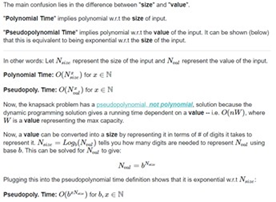

## Knapsack
Given __two integer arrays values[n-1] and weights[n-1]__ and an integer __W = knapsack capacity__. For subsets with weights <= W (cannot break an item), find the subset with max value

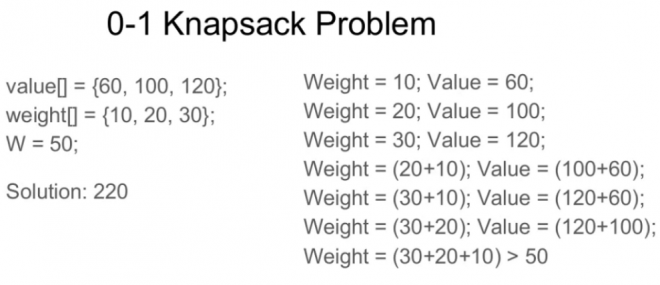

__Naive solution__:  
Consider only subsets w/total weight < W; from them, pick the max value subset

Max value from n items is max of:
* Max value obtained with n-1 items and W (excluding nth item).
* Value of nth item plus maximum value obtained with n-1 items and W - weight of nth item (including nth item).   
If weight of nth item > W => nth item cannot be included and Case 1 is the only possibility

In [11]:
# a naive recursive implementation; time c. O(2^n), space c. O(1)
def knapsack(W, wt, val, n):  
    
    if n == 0 or W == 0:                                                    # base case 
        return 0  
          
    if wt[n-1] > W:                                                         # if weight of the nth item > W, exclude nth item
        return knapsack(W, wt, val, n-1) 
  
    # return the maximum of two cases: 
    # (1) nth item included, (2) not included 
    else: 
        return max( val[n-1] + knapsack( W-wt[n-1], wt, val, n-1),  knapsack(W, wt, val, n-1))

val = [60, 100, 120]
wt = [10, 20, 30] 
W = 50
length_val = len(val) 
print(knapsack(W, wt, val, length_val))

220


__DP Solution__:    
Like for other DP solutions, avoid recomputations of same subproblems by __constructing temp array K[][] in bottom-up manner__

__DP[][]__ table: columns = all possible weights 1 - W, rows = weights that can be kept.  
State DP[i][j] = max value of j-weight considering all values 1 - i. If wi = weight in ith row, it can be filled for all columns w/weight values > wi. Two possibilities:
* __fill__ wi in the given column
* __don't fill__ wi in the given column

based on __max of these two possibilities__ (if not fill ith weight in jth column => __DP[i][j] state = DP[i-1][j]__ state, but if fill => DP[i][j] state = wi + value of the column weighing j-wi in the previous row) 

In [6]:
# DP solution (memoization?)
# O(N*W) time and space
def knapSack(W, weights, values, n): 
    DP = [[0 for x in range(W + 1)] for x in range(n + 1)] 
  
    # Build table DP[][] in bottom up manner 
    for i in range(n + 1): 
        for w in range(W + 1): 
            if i == 0 or w == 0: 
                DP[i][w] = 0
            elif weights[i-1] <= w: 
                DP[i][w] = max(values[i-1] + DP[i-1][w - weights[i-1]],  DP[i-1][w]) 
            else: 
                DP[i][w] = DP[i-1][w] 
  
    return DP[n][W] 
  
values = [60, 100, 120] 
weights = [10, 20, 30] 
W = 50
print(knapSack(W, weights, values, len(values)))

220


__Memoization solution (extension of recursive approach)__

Extension of recursive approach to overcome recalculations of the same cases - create __2D array storing a particular state (n, w)__ - now if we get it again, we can use the stored results (constant time) instead of recalculating

In [8]:
# Recursion + memoization solution  
# returns max value to fit in knapsack of capacity W
# O(N*W) time and space  
def knapsack(weights, values, W, length):     
  
    # base conditions 
    if length == 0 or W == 0: 
        return 0
    if DP[length][W] != -1: 
        return DP[length][W] 
  
    # choice diagram code 
    if wt[length - 1] <= W: 
        DP[length][W] = max( values[length-1] + knapsack( weights, values, W - wt[length-1], length-1),
                            knapsack(weights, values, W, length - 1)) 
        return DP[length][W] 
    elif wt[length - 1] > W: 
        DP[length][W] = knapsack(weights, values, W, length-1) 
        return DP[length][W]
    

values = [60, 100, 120] 
weights = [10, 20, 30] 
W = 50
length = len(val) 
  
# initialize the matrix with -1 at first 
DP = [[-1 for i in range(W + 1)] for j in range(length + 1)]

print(knapsack(weights, values, W, length)) 

220


## Coin change (knapsack variant)
Classic recursion problem: target amount n + array of distinct coins => fewest coins to make the change
Example: if n = 10 and coins = [1,5,10]. Then there are 4 possible ways to make change:
* 1+1+1+1+1+1+1+1+1+1
* 5 + 1+1+1+1+1
* 5+5
* 10

Recursion is not optimal - each node = recursion call; label on node - amount of change composed of coins. We are recalculating values we've already solved! 15 is called 3 times. Much better to keep track of function calls
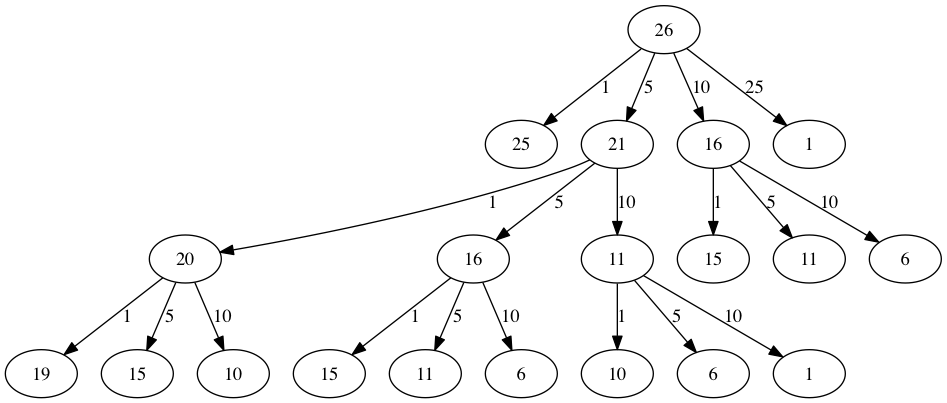
"Dynamic" solution reduces calls - storing results for min # coins in table => before computing new min, we check table if min is already known. This is no really dynamic, but an improvement of the recursive call using "memoization" otherwise known as "caching."

More here: [Dynamic Programming Coin Change Problem](http://interactivepython.org/runestone/static/pythonds/Recursion/DynamicProgramming.html)

In [1]:
# recursive, non-optimized
def rec_coin(target, coins):
    '''
    Target: change amount
    Coins: list of coin values
    '''    
    
    min_coins = target                                    # default to target value
    if target in coins:                                   # base case - check if we have a single coin match
        return 1
    
    else:       
        for i in [c for c in coins if c <= target]:       # for each coin value <= target
            num_coins = 1 + rec_coin(target-i,coins)      # recursive call
            
            if num_coins < min_coins:                     # reset min if we have new min
                min_coins = num_coins
                
    return min_coins

In [2]:
rec_coin(63,[1,5,10,25])

6

In [ ]:
# using memoization or caching
def rec_coin_dynam(target, coins, known_results):
    '''
    Target: change amount
    Coins: list of coin values
    Known_results: previous results    
    '''
        
    min_coins = target                                      # default to target value
    
    if target in coins:                                     # base case 1 - check if we have a single coin match
        known_results[target] = 1
        return 1    
    elif known_results[target] > 0:                         # base case 2 - if this value was already calculated before
        return known_results[target]
    
    else:        
        for i in [c for c in coins if c <= target]:            
            num_coins = 1 + rec_coin_dynam(target-i, coins, known_results)
                        
            if num_coins < min_coins:
                min_coins = num_coins                       # reset min if we have new min
                known_results[target] = min_coins           # reset the known result
                
    return min_coins

In [ ]:
target = 74
coins = [1,5,10,25]
known_results = [0]*(target+1)        #why?

rec_coin_dynam(target, coins, known_results)

In [ ]:
# dynamic solution explained at https://runestone.academy/runestone/books/published/pythonds/Recursion/DynamicProgramming.html
def coin_dynam(coinValueList, change, minCoins, coinsUsed):
    for cents in range(change+1):
        coinCount = cents
        newCoin = 1
        for j in [c for c in coinValueList if c <= cents]:
            if minCoins[cents-j] + 1 < coinCount:
                coinCount = minCoins[cents-j]+1
                newCoin = j
        minCoins[cents] = coinCount
        coinsUsed[cents] = newCoin
    return minCoins[change]

def printCoins(coinsUsed, change):
    coin = change
    while coin > 0:
        thisCoin = coinsUsed[coin]
        print(thisCoin, end=', ')
        coin = coin - thisCoin

In [ ]:
amnt = 63
coin_list = [1,5,10,21,25]
coinsUsed = [0]*(amnt+1)
coinCount = [0]*(amnt+1)

print("Making change for",amnt,"requires")
print(coin_dynam(coin_list, amnt, coinCount, coinsUsed), "coins")
print("They are:")
printCoins(coinsUsed, amnt)
print("\nThe used list is as follows:")
print(coinsUsed)

Another dynamic solution is provided on the dedicated [Wikipedia page](https://en.wikipedia.org/wiki/Change-making_problem)

## Number of ways to cover a distance
Given a distance, count total number of ways to cover the distance with 1, 2 and 3 steps.

Examples:
Distance = 3  
Output: 4  
Explantion:  
Below are the four ways  
 1 step + 1 step + 1 step  
 1 step + 2 step  
 2 step + 1 step  
 3 step  

Distance = 4  
Output: 7  
Explantion:  
Below are the four ways  
 1 step + 1 step + 1 step + 1 step  
 1 step + 2 step + 1 step  
 2 step + 1 step + 1 step   
 1 step + 1 step + 2 step  
 2 step + 2 step  
 3 step + 1 step  
 1 step + 3 step
 
Time c. O(n).
Space c. O(n)

__Algorithm__
* Create an array of size n + 1 and initilize the first 3 variables with 1, 1, 2. The base cases.
* Run a loop from 3 to n.
* For each index i, computer value of ith position as dp[i] = dp[i-1] + dp[i-2] + dp[i-3].
* Print the value of dp[n], as the Count of number of ways to cover a distance.

In [2]:
def printCountDP(dist): 
    count = [0] * (dist + 1) 
      
    # Initialize base values - one way to cover 0 and 1 distances; two ways to cover 2 distance
    count[0] = 1
    count[1] = 1
    count[2] = 2
      
    # Fill the count array in bottom up manner 
    for i in range(3, dist + 1):
        count[i] = (count[i-1] + count[i-2] + count[i-3])
          
    return count[dist]; 
  

dist = 100
print( printCountDP(dist)) 

180396380815100901214157639


# Recursion

In [14]:
# example - factorial
def fact(n):
    '''
    Returns n!
    '''    
    if n == 0:                   # BASE CASE!
        return 1    
    else:                        # Recursion!
        return n * fact(n-1)
        
fact(5)

120

In [ ]:
# example - sum from 0 to n
def rec_sum(n):    
    
    if n == 0:                    # Base Case
        return 0    
    else:                         # Recursion
        return n + rec_sum(n-1)
    
rec_sum(100)

In [ ]:
# example - sum of all indiv digits of n
def sum_func(n):
    
    if len(str(n)) == 1:                  # Base case
        return n    
    else:                                 # Recursion
        return n%10 + sum_func(n//10)
    
sum_func(4321)

In [15]:
# example - split a phrase into words
def word_split(phrase, list_of_words, output=None):
    '''
    Parameters:
        phrase: string phrase
        list_of_words: list of words
    Returns:
        string split with words from list_of_words
    ''' 
    
    # Checks if output initiated; if default output=[], it will be overwritten in every recursion!
    if output is None:
        output = []
        
    for word in list_of_words:
                
        if phrase.startswith(word):                        
            output.append(word)                        
            return word_split(phrase[len(word):], list_of_words, output)        # recursion - pass along the output
    
    # return output if no phrase.startswith(word) is True
    return output        

In [16]:
print(word_split('themanran',['the','ran','man']))
print(word_split('ilovedogsJohn',['i','am','a','dogs','lover','love','John']))
print(word_split('themanran',['clown','ran','man']))

['the', 'man', 'ran']
['i', 'love', 'dogs', 'John']
[]


# Memoization

[Wikipedia article on Memoization](https://en.wikipedia.org/wiki/Memoization), before continuing on with this lecture!
Memoization = memo / to be remembered, __returns remembered results__ not to compute again. It's like a __cache__ for method results. It can be an __improved versions of a recursive solution__.

In [2]:
# Create cache for known results
def factorial(n):    
    if n < 2: 
        return 1    
    if not n in memo:
        memo[n] = n*factorial(n-1)        
    return memo[n]

memo = {}
factorial(5)

120

dict stores previous results => increased efficiency

Memoization encapsulated as a class:

In [ ]:
class Memoize:
    def __init__(self, f):
        self.f = f
        self.memo = {}
    def __call__(self, *args):
        if not args in self.memo:
            self.memo[args] = self.f(*args)
        return self.memo[args]

In [ ]:
def factorial(n):    
    if n < 2: 
        return 1    
    return n * factorial(n-1)

factorial = Memoize(factorial)
factorial(5)

### [Fibonnaci Sequence](https://en.wikipedia.org/wiki/Fibonacci_number) in three ways:
* Recursively
* Dynamically (Memoization to store results)
* Iteratively

Fibonacci sequence: 0,1,1,2,3,5,8,13,21,... starts with base case of checking if n=0 or 1 => returns 1; else return fib(n-1)+fib(n+2)

In [21]:
# recursive - exponential time O(2^n)
def fib_rec(n):    
    if n == 0 or n == 1:                                # basea case
        return n    
    else:
        return fib_rec(n-1) + fib_rec(n-2)

In [22]:
for i in range(40):
    print(fib_rec(i), end=', ')

0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040, 1346269, 2178309, 3524578, 5702887, 9227465, 14930352, 24157817, 39088169, 63245986, 

In [23]:
# dynamic - cache is set beforehand based on n
# checking if cache[n] != None means checking to know if we should keep setting cache (keep cache of old results!)
def fib_dyn(n):    
    
    if n == 0 or n == 1:                             # base case
        return n    
    
    if cache[n] != None:                             # check cache
        return cache[n]    
    
    cache[n] = fib_dyn(n-1) + fib_dyn(n-2)           # keep setting cache
    
    return cache[n]

In [24]:
# instantiate cache
for i in range(40):
    n = i
    cache = [None] * (n + 1)

    print(fib_dyn(n), end=', ')

0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040, 1346269, 2178309, 3524578, 5702887, 9227465, 14930352, 24157817, 39088169, 63245986, 

In [25]:
# iterative - tuple unpacking!
def fib_iter(n):
        
    a = 0
    b = 1
        
    for i in range(n):        
        a, b = b, a + b
        
    return a

In [26]:
for i in range(40):
    print(fib_iter(i), end=', ')

0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040, 1346269, 2178309, 3524578, 5702887, 9227465, 14930352, 24157817, 39088169, 63245986, 